<a href="https://colab.research.google.com/github/KatyayaniPande/SC1015/blob/main/dsai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


Predicting the salaries for data science job postings is a complex task, as there are numerous factors that can influence the salary range for a given job title and location. However, by analyzing a large dataset of job postings and salaries, we can develop a model that accurately predicts the salary range for a job posting based on the features of the job title, location, industry, and other relevant factors.

Specifically, we aim to analyse the salaries in the data science industry. We will use a combination of machine learning algorithms and statistical techniques to preprocess and transform the data, identify the most important features, and train a model that accurately predicts the salary range for job postings.

To evaluate the performance of our model, we will use various metrics such as mean absolute error, mean squared error, and R-squared value. Additionally, we will visualize the results of our analysis using interactive dashboards and data visualization tools to provide insights into the key factors that drive data science salaries in the United States. Ultimately, our goal is to provide a valuable resource for job seekers, employers, and researchers who want to understand the job market for data science roles and optimize their hiring and recruiting strategies.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#The library below will be used to converty country names from ISO codes later on
!pip install country-converter
import country_converter as coco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [3]:
#Importing and reading contents of the salaries data file
from google.colab import files
uploaded = files.upload()
salaries_df = pd.read_csv("ds_salaries.csv", index_col=0)


Saving ds_salaries.csv to ds_salaries (1).csv


In [4]:
#Describe our dataset and all its columns 
salaries_df.info()
#Checking the total data entries
num_rows, num_cols = salaries_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB
Number of rows: 607
Number of columns: 11


We now know the datatypes of each column and also know that there are no NULL values in any of the columns.

In [5]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Data Preparation and Data Cleaning

In [6]:
#Renaming Data Columns to make it easier to understand

#Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
salaries_df['experience_level']=salaries_df['experience_level'].map(experience_level_dict)

#Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
salaries_df['employment_type'] = salaries_df['employment_type'].map(employment_type_dict)

#Remote_ratio = Converting the text into a ratio for easy analysis
salaries_df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
salaries_df['remote_ratio']=salaries_df['remote_ratio'].astype(object)

#Employee Residence & Company location (using ISO code)
#We are grouping each of the countries by its accronym so it is easier 
ISO3166 = {'AD': 'Andorra','AE': 'United Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda','AI': 'Anguilla',
           'AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles','AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina',
           'AS': 'American Samoa','AT': 'Austria','AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina',
           'BB': 'Barbados','BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain','BI': 'Burundi',
           'BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil','BS': 'Bahama','BT': 'Bhutan',
           'BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana','BY': 'Belarus','BZ': 'Belize','CA': 'Canada',
           'CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic','CG': 'Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)',
           'CK': 'Cook Iislands','CL': 'Chile','CM': 'Cameroon','CN': 'China','CO': 'Colombia','CR': 'Costa Rica','CS': 'Czechoslovakia (no longer exists)',
           'CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island','CY': 'Cyprus','CZ': 'Czech Republic','DD': 'German Democratic Republic (no longer exists)',
           'DE': 'Germany','DJ': 'Djibouti','DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
           'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia','FI': 'Finland','FJ': 'Fiji',
           'FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands','FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon',
           'GB': 'United Kingdom (Great Britain)','GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar',
           'GL': 'Greenland','GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece','GS': 'South Georgia and the South Sandwich Islands',
           'GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau','GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras',
           'HR': 'Croatia','HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India','IO': 'British Indian Ocean Territory',
           'IQ': 'Iraq','IR': 'Islamic Republic of Iran','IS': 'Iceland','IT': 'Italy','JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya',
           'KG': 'Kyrgyzstan','KH': 'Cambodia','KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
           'KR': 'Korea, Republic of','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Lao People\'s Democratic Republic','LB': 'Lebanon',
           'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania','LU': 'Luxembourg','LV': 'Latvia',
           'LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco','MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali',
           'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique','MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta',
           'MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi','MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia','NE': 'Niger',
           'NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands','NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)',
           'NU': 'Niue','NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea','PH': 'Philippines','PK': 'Pakistan',
           'PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn','PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
           'RO': 'Romania','RU': 'Russian Federation','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands','SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden',
           'SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia','SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
           'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe','SU': 'Union of Soviet Socialist Republics (no longer exists)',
           'SV': 'El Salvador','SY': 'Syrian Arab Republic','SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
           'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia','TO': 'Tonga','TP': 'East Timor',
           'TR': 'Turkey','TT': 'Trinidad & Tobago','TV': 'Tuvalu','TW': 'Taiwan, Province of China','TZ': 'Tanzania, United Republic of','UA': 'Ukraine',
           'UG': 'Uganda','UM': 'United States Minor Outlying Islands','US': 'United States of America','UY': 'Uruguay','UZ': 'Uzbekistan',
           'VA': 'Vatican City State (Holy See)','VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands',
           'VI': 'United States Virgin Islands','VN': 'Viet Nam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
           'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe','ZZ': 'Unknown or unspecified country',
}

salaries_df['employee_residence'] = salaries_df['employee_residence'].map(ISO3166)
salaries_df['company_location'] = salaries_df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
salaries_df.company_size=salaries_df['company_size'].map(company_size_dict)


#The above lines map the values in dataframe columns to the corresponding categories in the dictionaries 

In [7]:
#Reclassifying and mapping data points to categorise them for easy visualisation

employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

# We created a duplicate of the column job title called job type. In this new column "job_type" we are going to use the dictionary values created above to map the corresponding jobs in to its particular job type. 
# Creating duplicate column named job_type
salaries_df['job_type'] = salaries_df.loc[:, 'job_title']

#Change the values in job type to fit the values in the dictionary
salaries_df["job_type"] = salaries_df["job_title"].map(employment_classification)

#Check the new data set
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  605 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  job_type            607 non-null    object
dtypes: int64(3), object(9)
memory usage: 61.6+ KB


In [8]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_type
0,2020,Mid-level / Intermediate,Full Time,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,Large,Data Scientist
1,2020,Senior-level / Expert,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small,Machine Learning Scientist
2,2020,Senior-level / Expert,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium,Data Engineer
3,2020,Mid-level / Intermediate,Full Time,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,Small,Data Analyst
4,2020,Senior-level / Expert,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,Partially Remote,United States of America,Large,Machine Learning Engineer


# Salaries Analysis

## Salary and Work Year

In [9]:
#Calculating the Average Salaries (in usd) by year
salary_timeline = pd.DataFrame(salaries_df.groupby("work_year")["salary_in_usd"].mean())
salary_timeline = salary_timeline.reset_index()
salary_timeline.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
salary_timeline["work_year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)
salary_timeline

,work_year,mean_salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


Calculating and displaying the mean salary for each year 

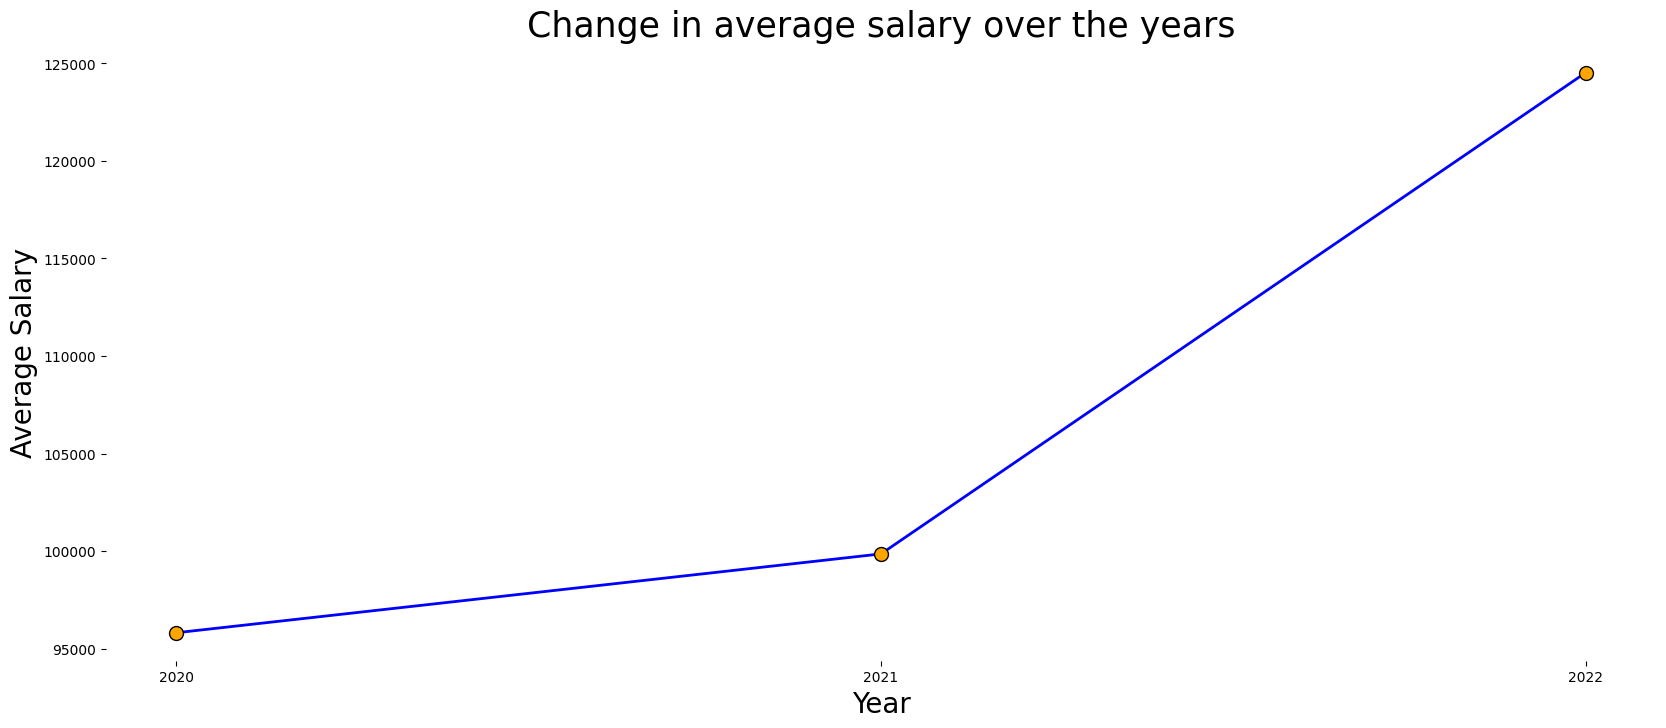

In [10]:
#Visualising the change in average salaries over the 3 years for all jobs in the Data Science industry
plt.subplots(figsize=(20,8))
p = sns.lineplot(x=salary_timeline["work_year"], y=salary_timeline["mean_salary_in_usd"], data=salary_timeline, color="blue", marker="o", linewidth=2, markersize=10, markerfacecolor="orange", markeredgecolor="black", markeredgewidth=1)
p.axes.set_title("Change in average salary over the years", fontsize=25)
p.axes.set_xlabel("Year", fontsize=20)
p.axes.set_ylabel("Average Salary", fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()


## Salary and Company Size

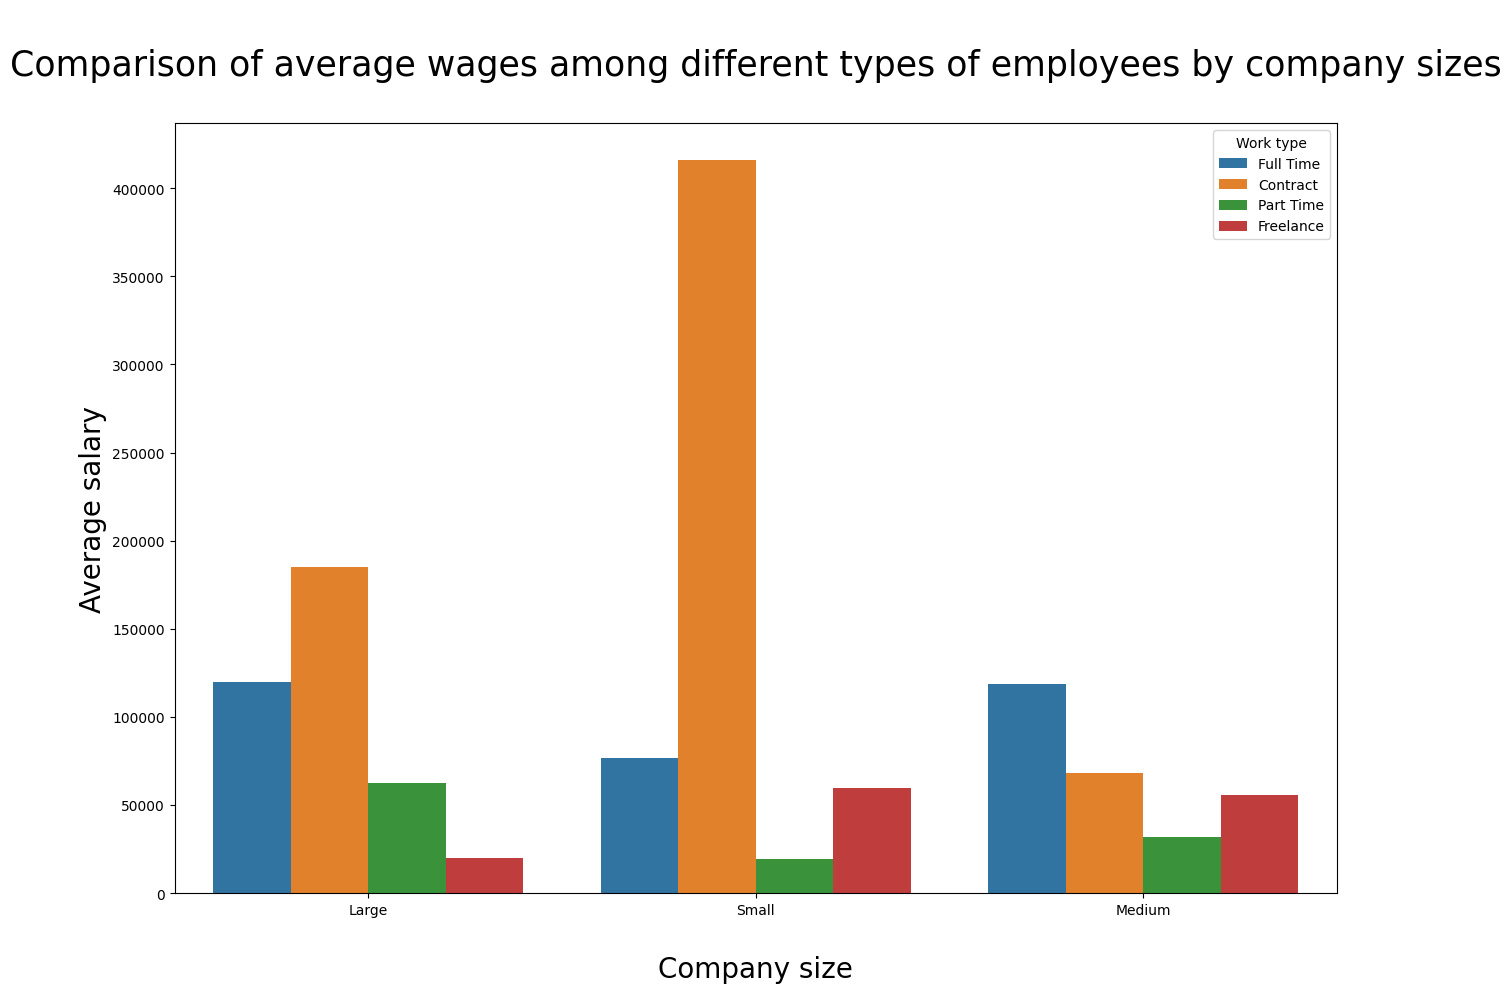

In [11]:
#Visualising the average wages depending on the company size
plt.subplots(figsize=(15, 10))
p = sns.barplot(data=salaries_df, x='company_size', y='salary_in_usd', hue='employment_type',errorbar=None)
p.set_title('\nComparison of average wages among different types of employees by company sizes\n', fontsize=25)
p.set_xlabel('\nCompany size', fontsize=20)
p.set_ylabel('Average salary', fontsize=20)
plt.legend(title='Work type')
plt.show()

The size of each bar represents the average salary for each company size and employment type combination. We notice that the proportion of wages for contract workers is highest in small size companies.  However, it is also interesting to notice that they take up a decent space in Large size companies as well. 

## Salary and Experience Level


In [12]:
#Calculates the Average salaries for each Experience Level for the 3 years
year_salary=salaries_df.groupby(["work_year","experience_level"], as_index=False)["salary_in_usd"].mean()
year_salary

,work_year,experience_level,salary_in_usd
0,2020,Entry-level / Junior,63648.600000
1,2020,Executive-level / Director,202416.500000
2,2020,Mid-level / Intermediate,85950.062500
3,2020,Senior-level / Expert,137240.500000
4,2021,Entry-level / Junior,59101.021277
5,2021,Executive-level / Director,223752.727273
6,2021,Mid-level / Intermediate,85490.088889
7,2021,Senior-level / Expert,126596.188406
8,2022,Entry-level / Junior,65423.428571
9,2022,Executive-level / Director,178313.846154


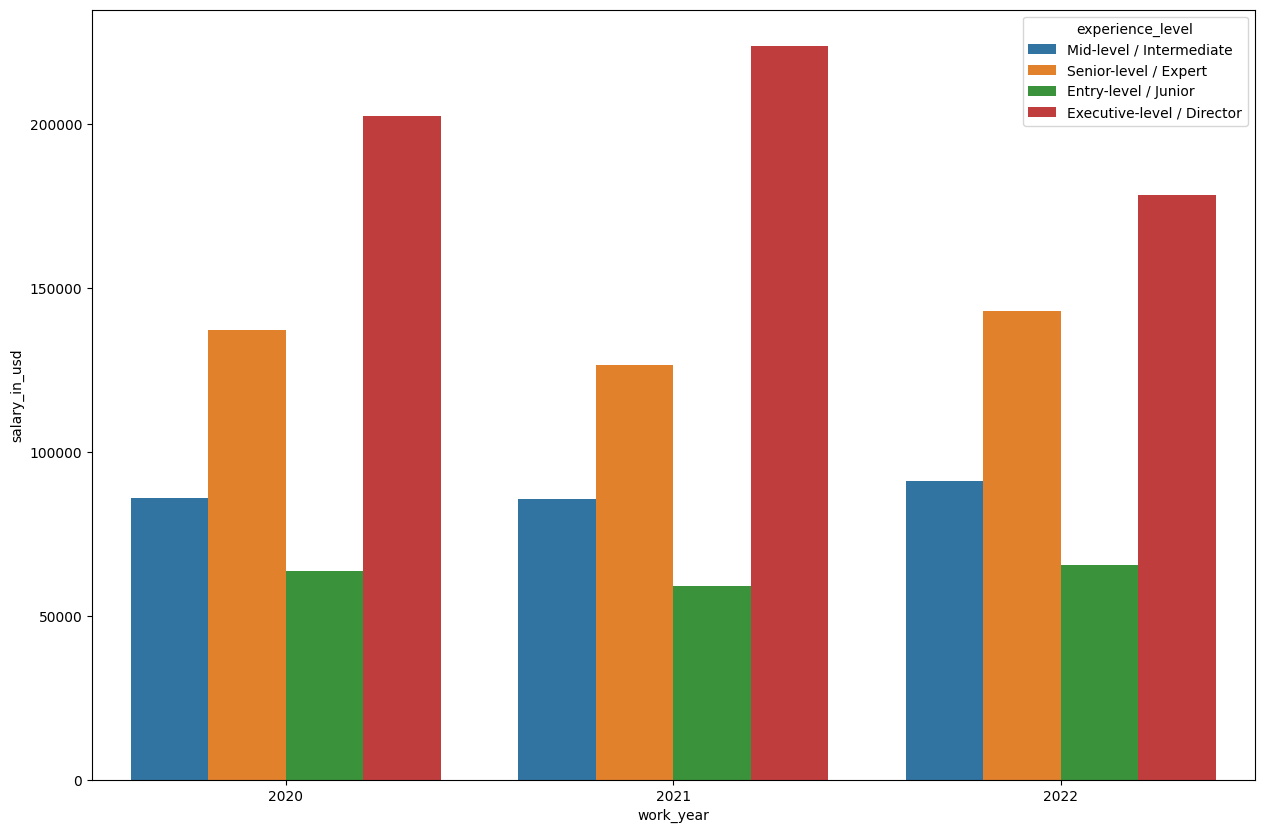

In [13]:
plt.subplots(figsize=(15, 10))
p = sns.barplot(data=salaries_df, x='work_year', y='salary_in_usd', hue='experience_level',errorbar=None)
plt.show()


Average salaries (in USD) grouped by experience level for each year. It is not surpising that the Director Level salaries are usually the highest. There has been a dip in the average salaries for the executive position from 2021 to 2022. We culd atribute this to the fact that Data Science is an emerging field and with the massive developments the past year, the companies would be out for hiring fresher newer talents to keep up with the trends. 

## Salary and Job Titles

In [14]:
#Calculates mean salaries by grouping the salary dataframe by work year and job title
role_salary = salaries_df.groupby(["work_year","job_title"], as_index=False)['salary_in_usd'].mean()
role_salary = role_salary.sort_values('salary_in_usd', ascending=False)



In [15]:
#Displays top 10 jobs with highest salaries for all years
df_sorted_title = salaries_df.sort_values(['work_year', 'salary_in_usd'], ascending=[False,False])
for year in sorted(df_sorted_title['work_year'].unique()):
    print(f"Top 10 Jobs with the highest maximum salary in {year}:")
    display(df_sorted_title[df_sorted_title['work_year'] == year].head(10)[['job_title','salary_in_usd']])





Top 10 Jobs with the highest maximum salary in 2020:


,job_title,salary_in_usd
33,Research Scientist,450000
63,Data Scientist,412000
25,Director of Data Science,325000
1,Machine Learning Scientist,260000
37,Machine Learning Engineer,250000
67,Data Science Manager,190200
6,Lead Data Scientist,190000
47,Data Engineer,188000
4,Machine Learning Engineer,150000
55,Principal Data Scientist,148261


Top 10 Jobs with the highest maximum salary in 2021:


,job_title,salary_in_usd
252,Principal Data Engineer,600000
97,Financial Data Analyst,450000
157,Applied Machine Learning Scientist,423000
225,Principal Data Scientist,416000
93,Lead Data Engineer,276000
78,ML Engineer,270000
231,ML Engineer,256000
167,Director of Data Science,250000
141,Data Science Manager,240000
74,Head of Data,235000


Top 10 Jobs with the highest maximum salary in 2022:


,job_title,salary_in_usd
523,Data Analytics Lead,405000
519,Applied Data Scientist,380000
482,Data Engineer,324000
534,Data Architect,266400
416,Data Scientist,260000
337,Data Engineer,243900
309,Data Engineer,242000
421,Data Science Manager,241000
486,Data Scientist,230000
592,Data Scientist,230000


In [16]:
# Group the data by job type and calculate the average salary
highest_paying_jobs = salaries_df.groupby('job_type')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
highest_paying_jobs

fig = px.bar(highest_paying_jobs, x='salary_in_usd', y=highest_paying_jobs.index, 
             orientation='h', 
             labels={'salary_in_usd': 'Average Salary (USD)', 'job_type': 'Job Type'},
             title='Top 10 Highest Paying Job Types in Data Science across past 3 years')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()

## Top paying jobs for entry level candidates

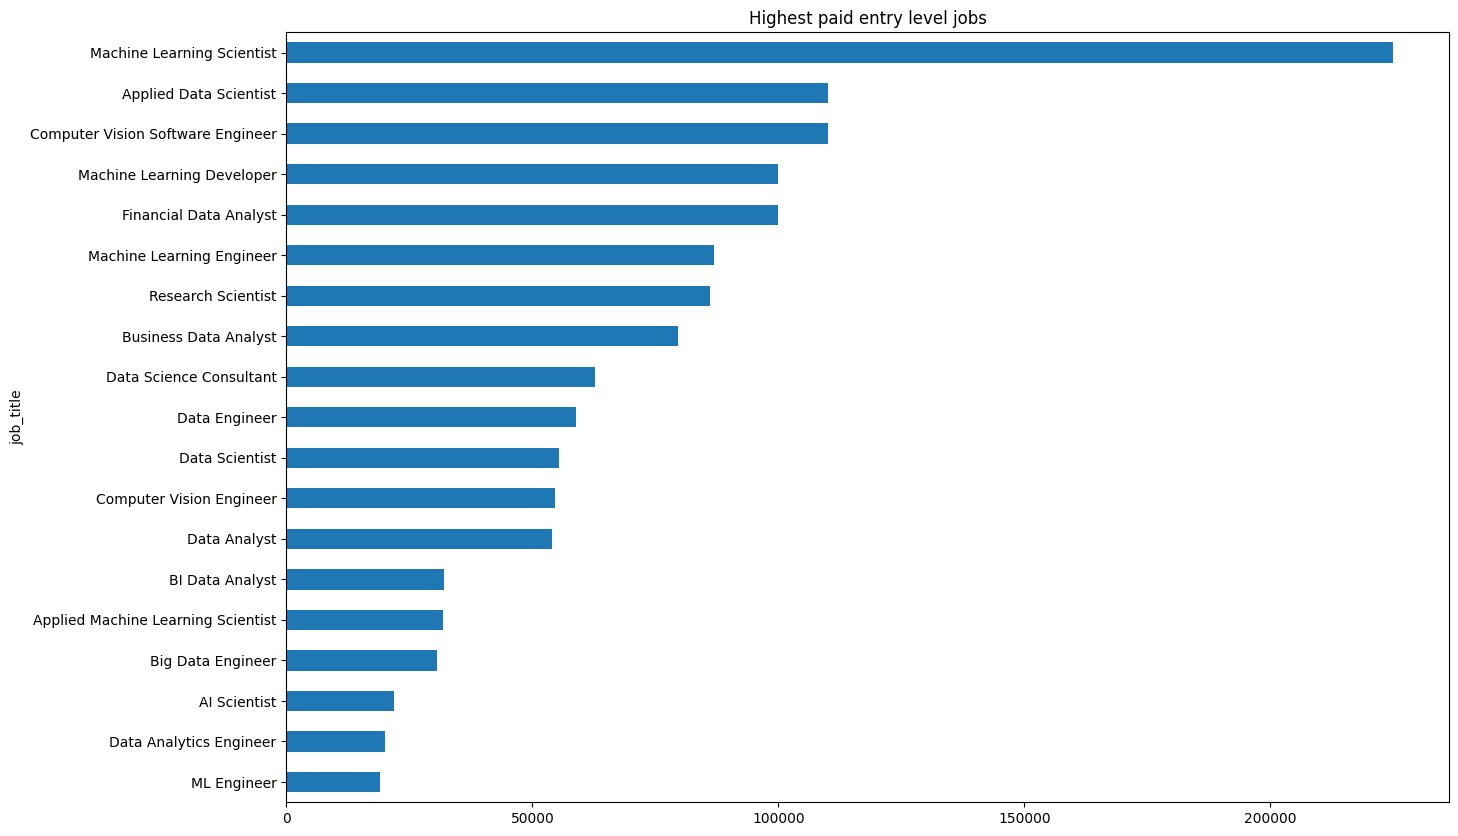

In [17]:
#Calculate and show the top-paying jobs for entry-level/junior candidates
plt.figure(figsize=(15,10))
xdf=salaries_df.groupby("experience_level").get_group("Entry-level / Junior").groupby("job_title").salary_in_usd.mean().sort_values().plot.barh()
plt.title('Highest paid entry level jobs')
plt.show()


# Distribution of Salaries for Job Type

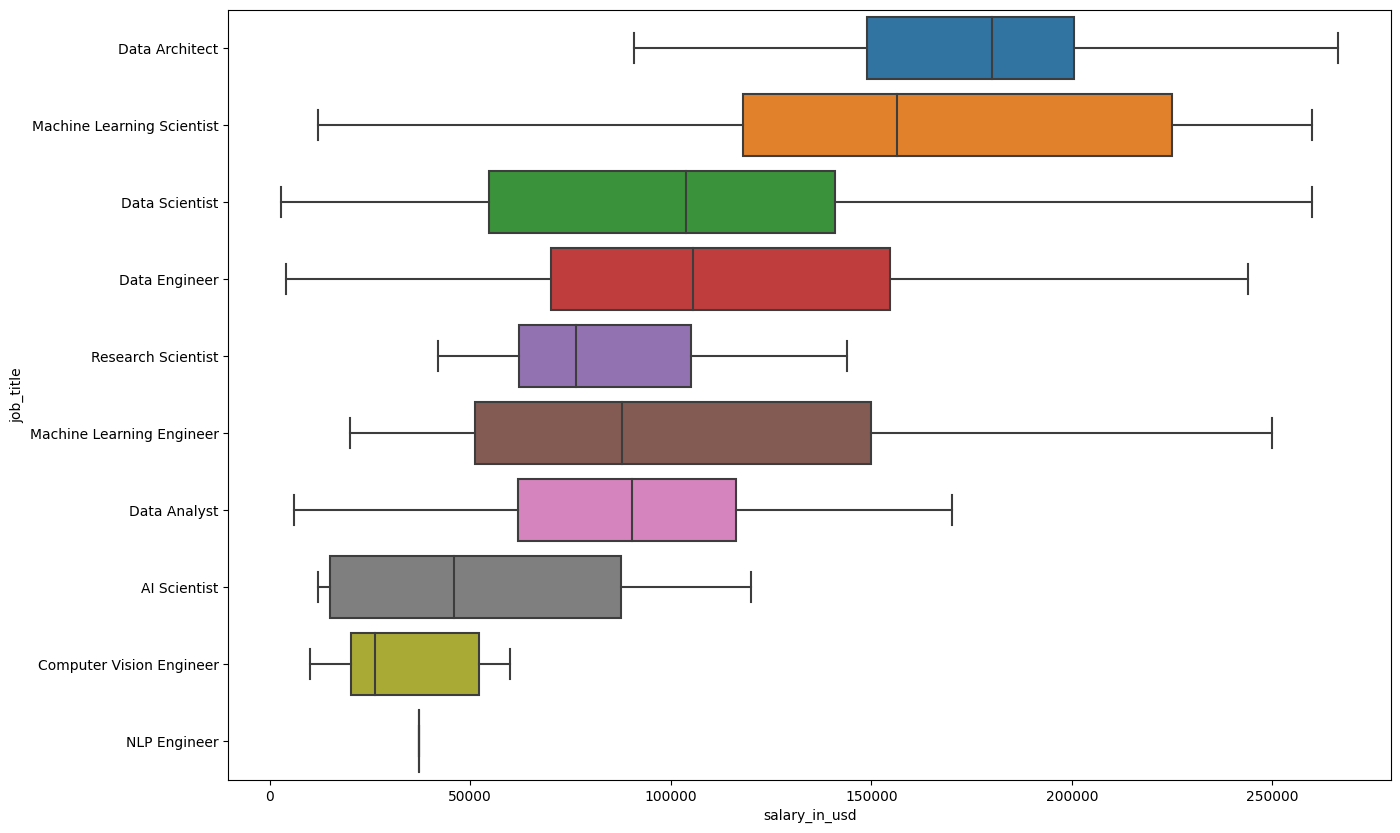

In [18]:
#Distribution of salaries for different job types
plt.figure(figsize=(15,10))
order=salaries_df.groupby("job_type").salary_in_usd.mean().sort_values(ascending=False).index
sns.boxplot(y='job_title', x='salary_in_usd', data=salaries_df, showfliers=False,order=order)
plt.show()

## Overall Salary Analysis

## fix


# Salary with work year and remote ratio

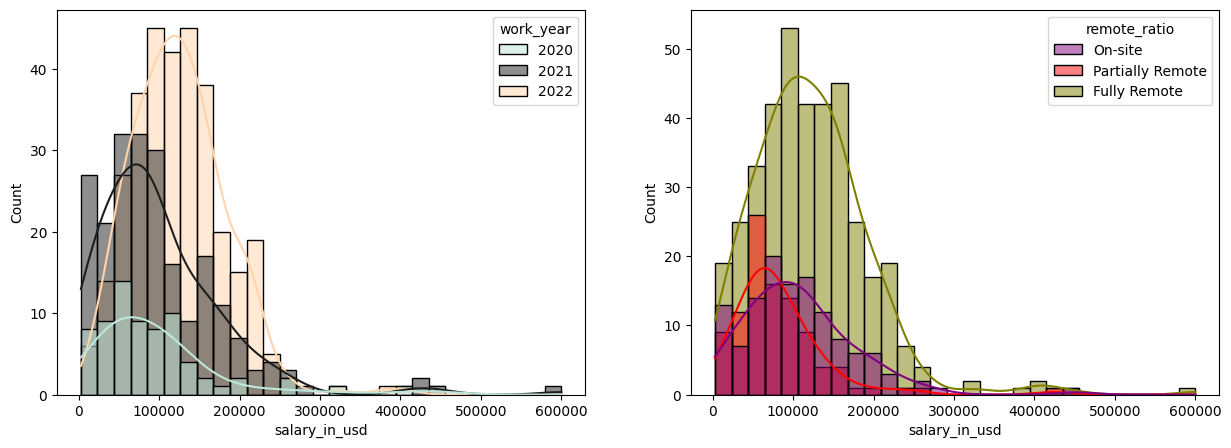

In [19]:
#__________
figure,axis=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.histplot(data=salaries_df, x="salary_in_usd",kde=True,hue='work_year',ax=axis[0],palette="icefire")
sns.histplot(data=salaries_df, x="salary_in_usd",kde=True,hue='remote_ratio',ax=axis[1],palette="brg")
plt.show()

From the graph above we can see that the rise of salaries over the year has increased slightly due to the shift in the peak of the distribution.
From the graph above we can see that fully remote jobs are the most popular
Fully remote and on-site seem to peak around 12000, while partially remote is about 8000



# Top 10 Most popular Data Science Jobs

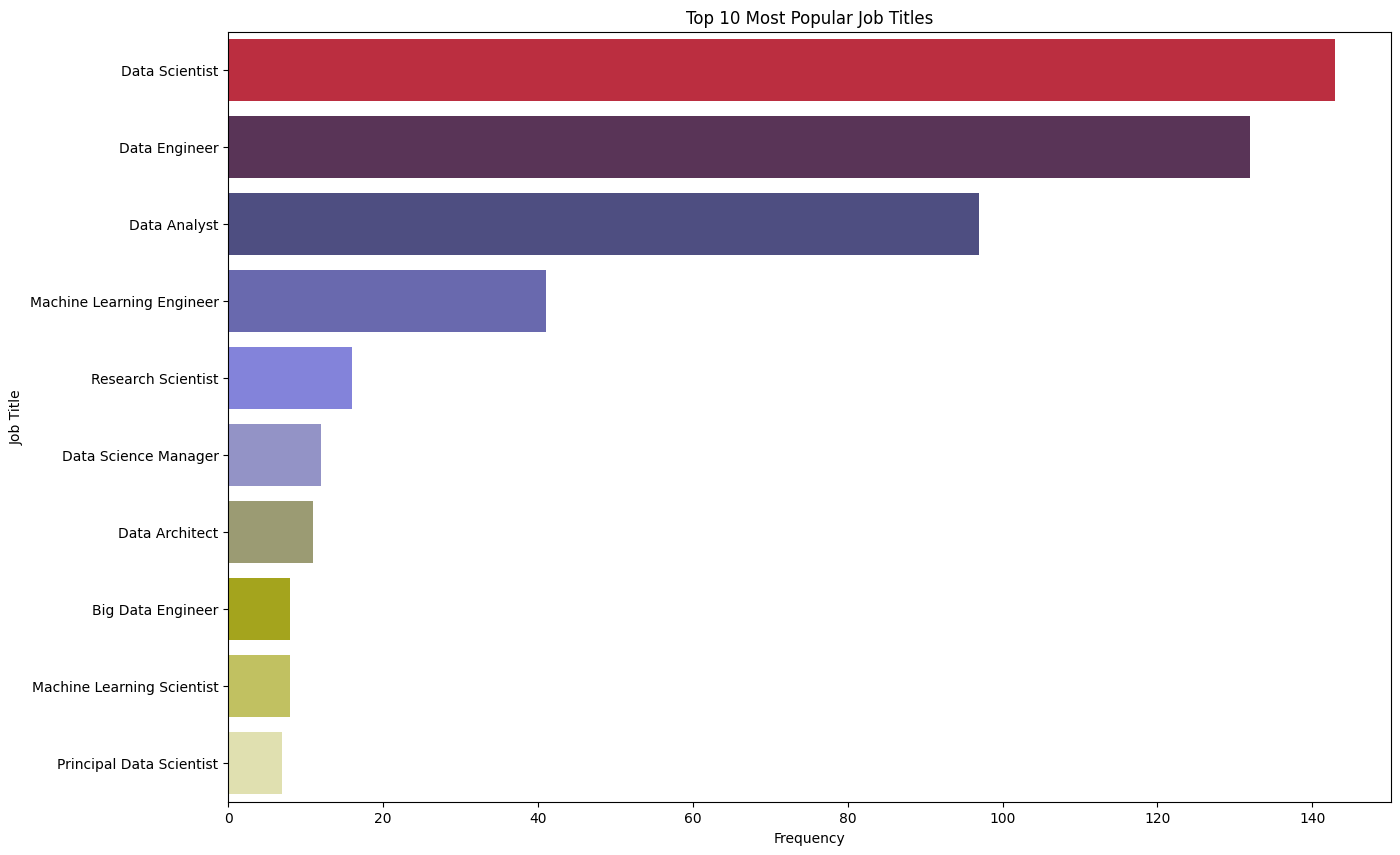

In [20]:
popular = salaries_df["job_title"].value_counts()[:10].to_frame()

plt.figure(figsize=(15,10))
g = sns.barplot(y=popular.index, x=popular["job_title"], data=popular, palette="gist_stern")
g.set_title('Top 10 Most Popular Job Titles')
g.set_ylabel('Job Title')
g.set_xlabel('Frequency')

plt.show()


# Countries where most no.of Data Sience employees reside

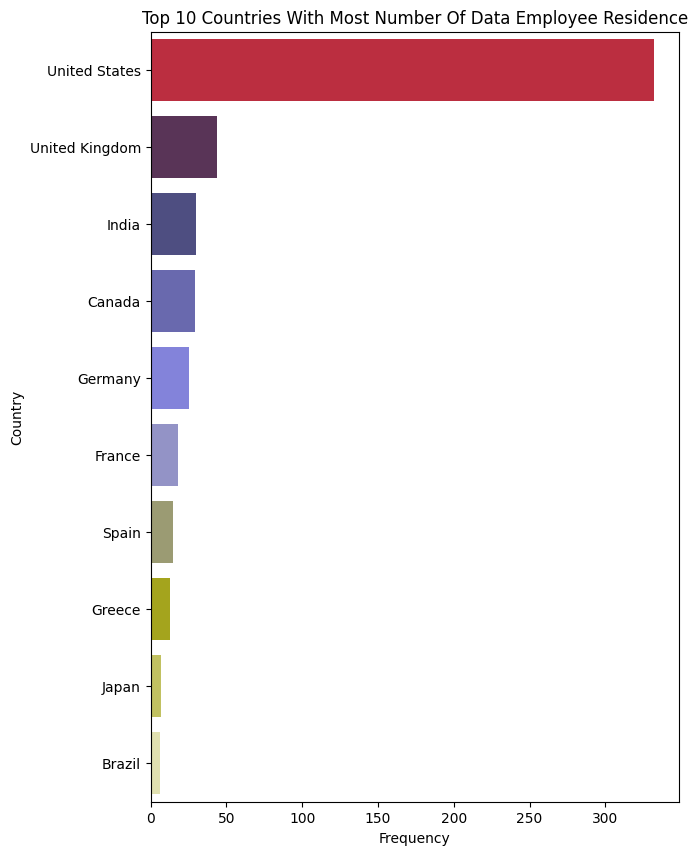

In [21]:
emp = salaries_df["employee_residence"].value_counts()[:10].to_frame()

#Convert the codes back to the country names for better understanding
emp.index = coco.convert(names=emp.index.tolist(), to='name_short', not_found=None) 

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(y=emp.index, x=emp["employee_residence"], data=emp, palette="gist_stern")
plt.title("Top 10 Countries With Most Number Of Data Employee Residence")
plt.ylabel("Country")
plt.xlabel("Frequency")
plt.show()

# Salary Distribution by Experience Level and Company Size

<function matplotlib.pyplot.show(close=None, block=None)>

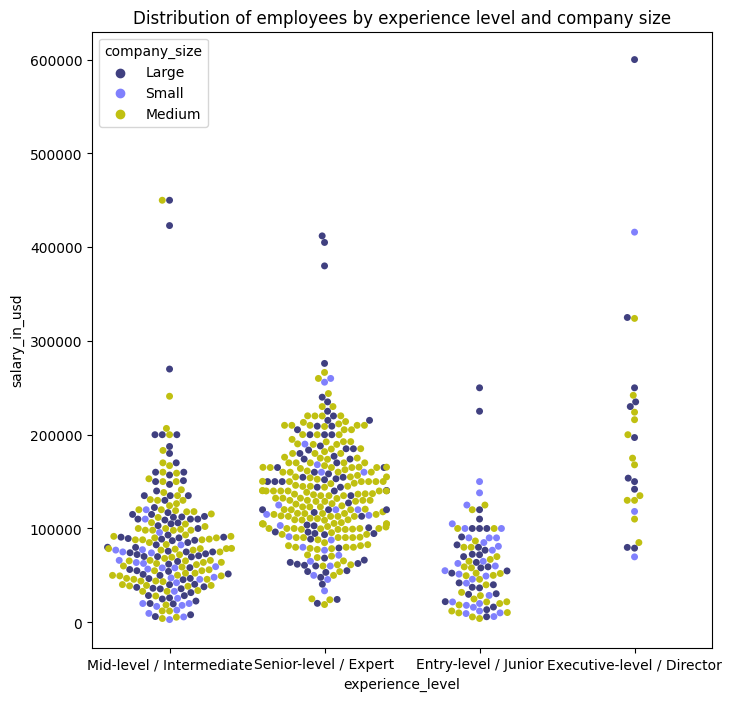

In [22]:
#Distribution of employees by their experience level and company size
plt.figure(figsize=(8,8))
sns.swarmplot(data=salaries_df,x=salaries_df['experience_level'],y=salaries_df['salary_in_usd'],hue=salaries_df['company_size'],palette="gist_stern")
plt.title("Distribution of employees by experience level and company size")
plt.show

Senior employees in large companies are generally paid higher salaries compared to mid-size and small companies. There are some outliers in every category, which suggests that there are some employees who are being paid much more or much less compared to their peers.

# Correlation

In [23]:
work_year = pd.DataFrame(salaries_df[['work_year']])
experience_level = pd.DataFrame(salaries_df[['experience_level']])
employment_type = pd.DataFrame(salaries_df[['employment_type']])
job_title = pd.DataFrame(salaries_df[['job_title']])
salary = pd.DataFrame(salaries_df[['salary_in_usd']])
employee_residence = pd.DataFrame(salaries_df[['employee_residence']])
remote_ratio = pd.DataFrame(salaries_df[['remote_ratio']])
company_location = pd.DataFrame(salaries_df[['company_location']])
company_size = pd.DataFrame(salaries_df[['company_size']])

In [24]:
!pip install dython
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(salaries_df)
categorical_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


ContextualVersionConflict: ignored

In [ ]:
complete_correlation= associations(salaries_df, filename= 'complete_correlation.png', figsize=(10,10))

df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [ ]:
corr_matrix = salaries_df.corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Prediction


<Axes: ylabel='salary_in_usd'>

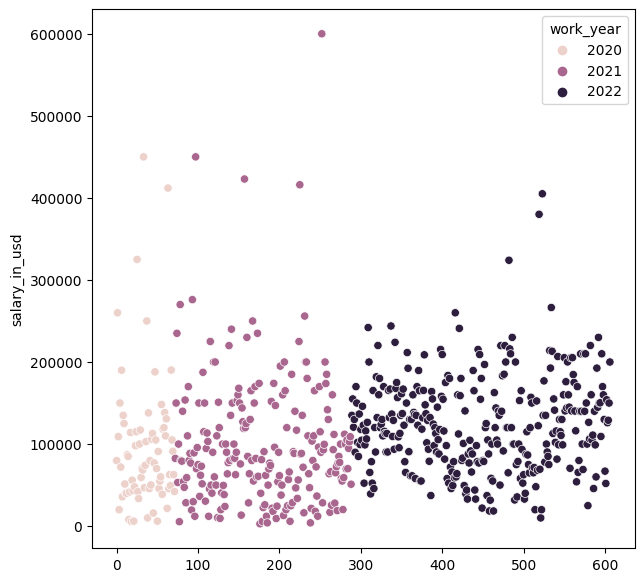

In [25]:
f = plt.figure(figsize=(7,7))
sns.scatterplot(data=salaries_df, x=salaries_df.index, y='salary_in_usd', hue='work_year')

Goodness of Fit of Model 	Test Dataset
Mean Absolute Error: 4039.0853278688523
Root Mean Squared Error: 12116.939912939017
R-squared Score: 0.9616914330598377

Training R-squared: 0.9937438656418843
Testing R-squared: 0.9616914330598377


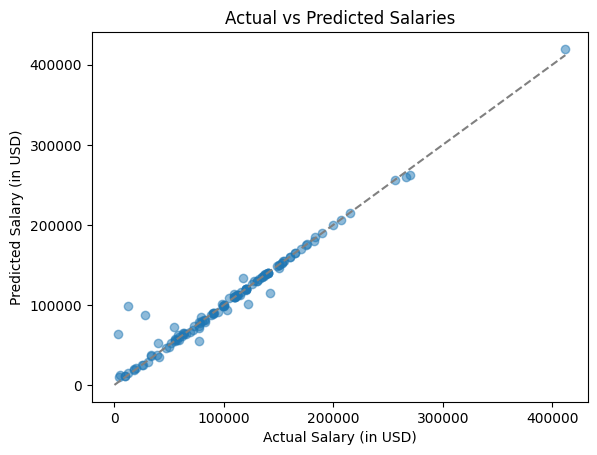

Cross-validation scores: [0.94824974 0.96395398 0.86065312 0.91152812 0.9687874 ]
Mean CV score: 0.9306344734487577
Std CV score: 0.04034495284790119


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Load the data
df = pd.read_csv('ds_salaries.csv')

# Select the features and target
X = df.drop(['salary_in_usd'], axis=1) #all variables except salary_in_usd
y = df['salary_in_usd']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Using a 80/20 split (20% of data is used for testing the model and 80% for training it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared Score:", r2_score(y_test, y_pred))
print()

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the testing set and calculate R-squared
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

# Create a scatter plot of actual vs predicted salaries
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line to represent perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='grey')

plt.xlabel('Actual Salary (in USD)')
plt.ylabel('Predicted Salary (in USD)')
plt.title('Actual vs Predicted Salaries')
plt.show()



# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Std CV score:", np.std(cv_scores))


Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. The MAE value found means predicted salaries are off by around $4,039 from the actual salaries.

Root Mean Squared Error (RMSE) measures the square root of the average squared difference between the predicted and actual values. The RMSE value shows that, on average, the predicted salaries are off by around $12,116 from the actual salaries. 
(Since RMSE is more sensitive to outliers compared to MAE, it is generally higher than MAE)

R-squared score (R2) measures the proportion of the variance in the target variable that is explained by the model. The R2 value of 0.962 indicates that around 96.2% of the variance in the target variable (salary) is explained by the model. 
(A high R2 score suggests that the model is able to capture most of the important patterns in the data)

There is a difference between our training and testing R2 values so wee checked for overfitting through Cross-Validation (splits model into several traiing and testing datat to see whether it is overfitting on one particular subset).
The high mean score indicates that the model is performing well on average across all folds, while the low standard deviation suggests that the model's performance is consistent across the folds. This is a good indication that the model is not overfitting to the training data and is generalizing well to new, unseen data.





In [27]:
# Get the feature importances
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)



                                   Importance
salary                               0.718145
salary_currency_USD                  0.161375
employee_residence_US                0.073793
job_title_Principal Data Engineer    0.007662
salary_currency_CAD                  0.003128
...                                       ...
company_location_IE                  0.000000
employee_residence_HN                0.000000
job_title_Marketing Data Analyst     0.000000
company_location_KE                  0.000000
employee_residence_DZ                0.000000

[189 rows x 1 columns]


The top few rows are the most important in predicting our target variable. It is interesting to see that the target variable itself is not the most important.

# Experience level

## Experience Level and Employment Type

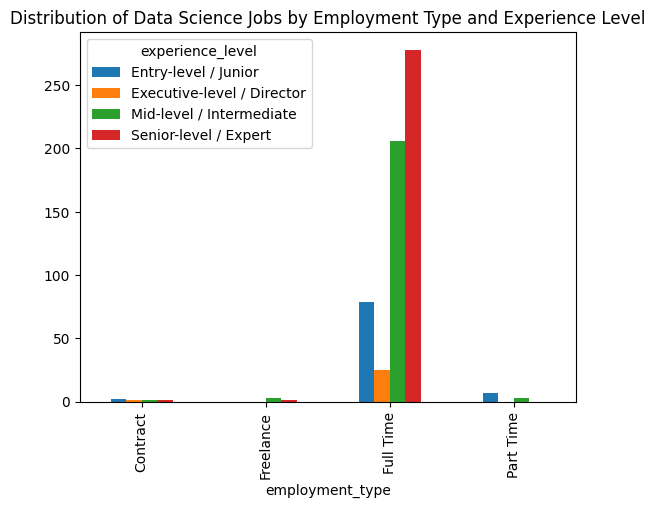

In [28]:
CrosstabResult=pd.crosstab(index=salaries_df['employment_type'],columns=salaries_df['experience_level'])
CrosstabResult.plot(kind='bar')

# Add a title to the chart
plt.title('Distribution of Data Science Jobs by Employment Type and Experience Level')
plt.show()

## Experience level and Company Size


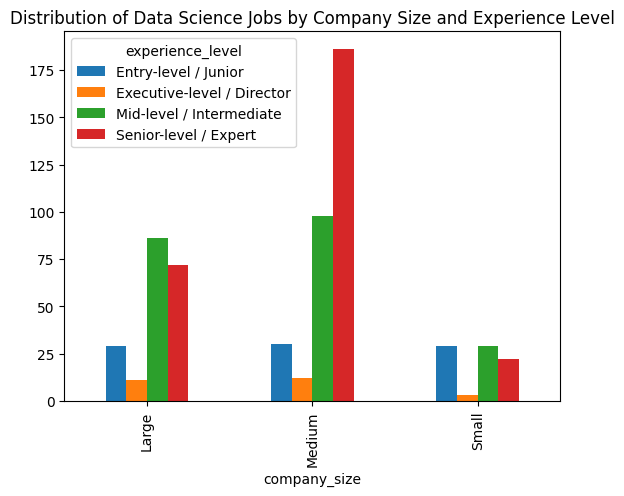

In [29]:
CrosstabResult=pd.crosstab(index=salaries_df['company_size'],columns=salaries_df['experience_level'])
CrosstabResult.plot(kind='bar')

# Add a title to the chart
plt.title('Distribution of Data Science Jobs by Company Size and Experience Level')
plt.show()


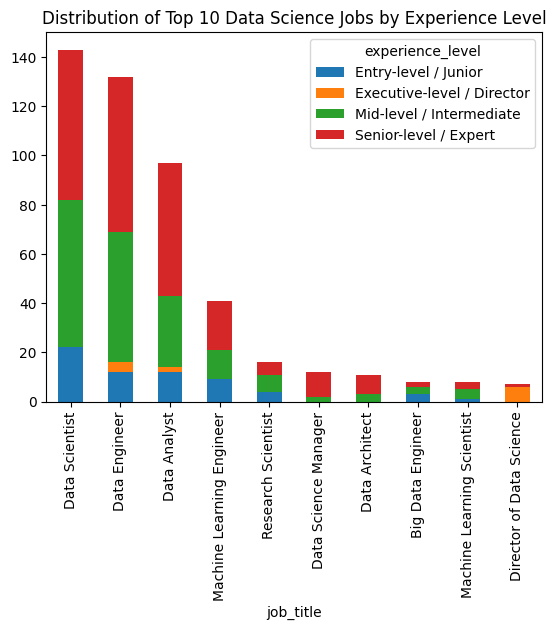

In [30]:
# Create a cross-tabulation of job_title and experience_level
crosstab_result = pd.crosstab(index=salaries_df['job_title'], columns=salaries_df['experience_level'])

# Sort the rows by the total count in descending order
crosstab_result = crosstab_result.loc[crosstab_result.sum(axis=1).sort_values(ascending=False).index]

# Select the top 10 rows
top_10 = crosstab_result.head(10)

# Create a stacked bar chart using matplotlib
top_10.plot(kind='bar', stacked=True)
# Add a title to the chart
plt.title('Distribution of Top 10 Data Science Jobs by Experience Level')

# Show the chart
plt.show()
